# Quick demo of using sklearn for regression

This demo covers:

* KNeighborsRegressor  : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
* DecisionTreeRegressor : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

You can see below uses of 'fit' and 'predict' for a 1-dim input to 1-dim output regression task based on the "abalone" dataset from UCI (also used in HW1).

FYI, the first part of the notebook has a brief demo of how arrays may share or not share data after assignment. This is a common GOTCHA for early Python NumPy users.

In [1]:
# imports and setup
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import math

import pandas as pd

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
pd.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlib plots

# Load data from csv file

In [2]:
with open('datasets/data_abalone/x_train.csv', 'r') as f:
    for line in f.readlines()[:5]:
        print(line.strip())

is_male,length_mm,diam_mm,height_mm,whole_weight_g,shucked_weight_g,viscera_weight_g,shell_weight_g
0.0,0.43,0.325,0.09,0.425,0.217,0.087,0.095
0.0,0.575,0.445,0.135,0.883,0.381,0.2035,0.26
0.0,0.585,0.475,0.185,0.8575,0.3465,0.1785,0.275
0.0,0.48,0.35,0.1,0.519,0.2365,0.1275,0.126


In [3]:
x_df = pd.read_csv('datasets/data_abalone/x_train.csv')

In [4]:
x_NF = x_df.values.copy()

# Assigning "arrB = arrA" does NOT copy underlying data


### FYI So does slicing like "arrB = arrA[:10]" 


Thus, any modifications to arrB will impact arrA as well!

In [5]:
arrA = x_NF.copy()

In [6]:
arrA.shape

(3176, 8)

In [7]:
arrA[:5]

array([[0.  , 0.43, 0.33, 0.09, 0.42, 0.22, 0.09, 0.1 ],
       [0.  , 0.57, 0.45, 0.14, 0.88, 0.38, 0.2 , 0.26],
       [0.  , 0.58, 0.47, 0.18, 0.86, 0.35, 0.18, 0.28],
       [0.  , 0.48, 0.35, 0.1 , 0.52, 0.24, 0.13, 0.13],
       [0.  , 0.7 , 0.56, 0.22, 1.67, 0.65, 0.43, 0.46]])

In [8]:
arrB = arrA # NOT A COPY!

In [9]:
arrB[0] = 1. # assigns first row of data in BOTH arrA and arrB

In [10]:
arrB[:5]

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.  , 0.57, 0.45, 0.14, 0.88, 0.38, 0.2 , 0.26],
       [0.  , 0.58, 0.47, 0.18, 0.86, 0.35, 0.18, 0.28],
       [0.  , 0.48, 0.35, 0.1 , 0.52, 0.24, 0.13, 0.13],
       [0.  , 0.7 , 0.56, 0.22, 1.67, 0.65, 0.43, 0.46]])

In [11]:
arrA[:5]

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.  , 0.57, 0.45, 0.14, 0.88, 0.38, 0.2 , 0.26],
       [0.  , 0.58, 0.47, 0.18, 0.86, 0.35, 0.18, 0.28],
       [0.  , 0.48, 0.35, 0.1 , 0.52, 0.24, 0.13, 0.13],
       [0.  , 0.7 , 0.56, 0.22, 1.67, 0.65, 0.43, 0.46]])

# Assigning "arrB = arrA.copy()" DOES copy underlying data

Thus, any modifications to arrB will NOT impact arrA at all.


In [12]:
arrA = x_NF.copy()

In [13]:
arrA[:5]

array([[0.  , 0.43, 0.33, 0.09, 0.42, 0.22, 0.09, 0.1 ],
       [0.  , 0.57, 0.45, 0.14, 0.88, 0.38, 0.2 , 0.26],
       [0.  , 0.58, 0.47, 0.18, 0.86, 0.35, 0.18, 0.28],
       [0.  , 0.48, 0.35, 0.1 , 0.52, 0.24, 0.13, 0.13],
       [0.  , 0.7 , 0.56, 0.22, 1.67, 0.65, 0.43, 0.46]])

In [14]:
arrB = arrA.copy() # Make a complete copy of array with separately allocated data in memory

In [15]:
arrB[0] = 1.0 # assign first row to all ones

In [16]:
arrA[:5]

array([[0.  , 0.43, 0.33, 0.09, 0.42, 0.22, 0.09, 0.1 ],
       [0.  , 0.57, 0.45, 0.14, 0.88, 0.38, 0.2 , 0.26],
       [0.  , 0.58, 0.47, 0.18, 0.86, 0.35, 0.18, 0.28],
       [0.  , 0.48, 0.35, 0.1 , 0.52, 0.24, 0.13, 0.13],
       [0.  , 0.7 , 0.56, 0.22, 1.67, 0.65, 0.43, 0.46]])

In [17]:
arrB[:5]

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.  , 0.57, 0.45, 0.14, 0.88, 0.38, 0.2 , 0.26],
       [0.  , 0.58, 0.47, 0.18, 0.86, 0.35, 0.18, 0.28],
       [0.  , 0.48, 0.35, 0.1 , 0.52, 0.24, 0.13, 0.13],
       [0.  , 0.7 , 0.56, 0.22, 1.67, 0.65, 0.43, 0.46]])

# Let's zoom in on one data analysis task

Regression of 'rings' given 'length' of abalone

In [18]:
x_df = pd.read_csv('datasets/data_abalone/x_train.csv')
x_NF = x_df.values.copy()

In [19]:
for col in x_df.columns:
    print(col)

is_male
length_mm
diam_mm
height_mm
whole_weight_g
shucked_weight_g
viscera_weight_g
shell_weight_g


### Keep only specific column related to length

In [20]:
xlength_N1 = x_NF[:, 1:2]

In [21]:
xlength_N1.shape

(3176, 1)

# Load in 'rings' data from y_train.csv

In [22]:
y_df = pd.read_csv('datasets/data_abalone/y_train.csv')
y_N = y_df.values[:,0]

In [23]:
y_N.shape

(3176,)

# 1-Nearest Neighbor Regression: length -> rings

## Fit

In [24]:
import sklearn.neighbors

In [25]:
k1nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=1, algorithm='brute', metric='euclidean')

In [26]:
k1nn_regr.fit(xlength_N1, y_N)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

### Predict with K=1 neighbors

Show the predictions at G=100 evenly spaced example lengths

Remember, calls to predict always need to have shape (n_examples x n_features)

Since we have one feature, we use [:,np.newaxis] to expand a G-shape into a (G,1) shape array

In [27]:
x_grid_G = np.linspace(xlength_N1.min(), xlength_N1.max(), 100)

In [28]:
yhat_k1nn_G = k1nn_regr.predict(x_grid_G[:,np.newaxis])

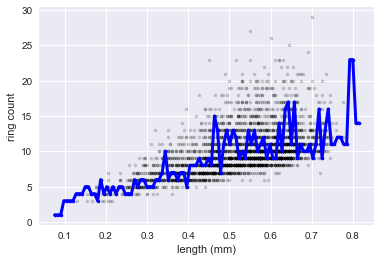

In [29]:
plt.plot(xlength_N1, y_N, 'k.', alpha=0.2)
plt.plot(x_grid_G, yhat_k1nn_G, 'b.-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');

# 5-Nearest Neighbor Regression: length -> rings

### Fit

In [30]:
k5nn_regr = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=5, algorithm='brute', metric='euclidean')
k5nn_regr.fit(xlength_N1, y_N)

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

### Predict

Show the predictions at G=100 evenly spaced example lengths

Remember, calls to predict always need to have shape (n_examples x n_features)

Since we have one feature, we use [:,np.newaxis] to expand a G-shape into a (G,1) shape array

In [31]:
x_grid_G = np.linspace(xlength_N1.min(), xlength_N1.max(), 100)

In [32]:
yhat_k5nn_G = k5nn_regr.predict(x_grid_G[:,np.newaxis])

### Visualize predictions and training data for K=5 NN

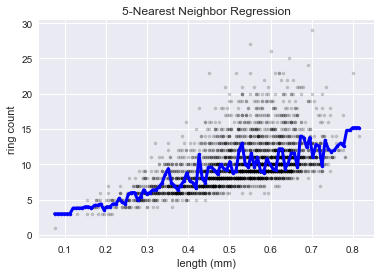

In [33]:
plt.plot(xlength_N1, y_N, 'k.', alpha=0.2)
plt.plot(x_grid_G, yhat_k5nn_G, 'b.-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title('5-Nearest Neighbor Regression');

## Decision Tree Regression: length -> rings

### Fit

In [34]:
import sklearn.tree

In [35]:
tree_regr = sklearn.tree.DecisionTreeRegressor(
    random_state=42, min_samples_leaf=500)

In [36]:
tree_regr.fit(xlength_N1, y_N)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=500,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

### Predict

Show the predictions at G=100 evenly spaced example lengths

Remember, calls to predict always need to have shape (n_examples x n_features)

Since we have one feature, we use [:,np.newaxis] to expand a G-shape into a (G,1) shape array

In [37]:
x_grid_G = np.linspace(xlength_N1.min(), xlength_N1.max(), 100)

In [38]:
yhat_tree_G = tree_regr.predict(x_grid_G[:,np.newaxis])

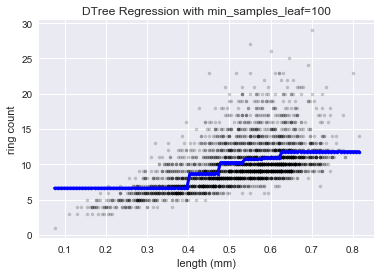

In [39]:
plt.plot(xlength_N1, y_N, 'k.', alpha=0.2)
plt.plot(x_grid_G, yhat_tree_G, 'b.-', linewidth=3);
plt.xlabel('length (mm)'); plt.ylabel('ring count');
plt.title('DTree Regression with min_samples_leaf=100');

# Visualizing decision trees with 'pydotplus'

This section requires a local install of `GraphViz` (https://www.graphviz.org/) and the `pydotplus` Python package.

You can simply do:

* `conda install -c anaconda graphviz`
* `conda install pydotplus`

inside your comp135_env environment.

In [40]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [41]:
# Make a variable to store some string info to
dot_data = StringIO()

In [42]:
# Call 'export_graphviz' provided by sklearn
sklearn.tree.export_graphviz(
    tree_regr, out_file=dot_data,
    feature_names=['length_mm'],
    precision=2,
    filled=True, rounded=True,
    special_characters=True)

In [43]:
graph_viz_obj = pydotplus.graph_from_dot_data(dot_data.getvalue())

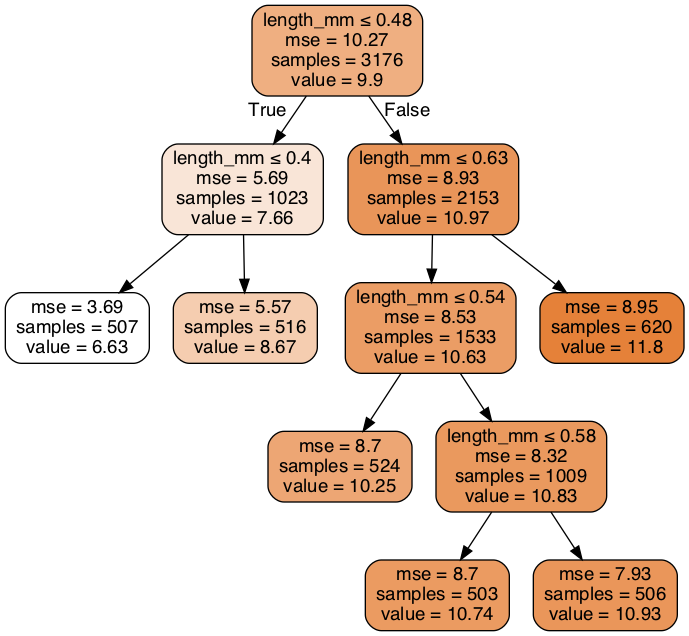

In [44]:
Image(graph_viz_obj.create_png())